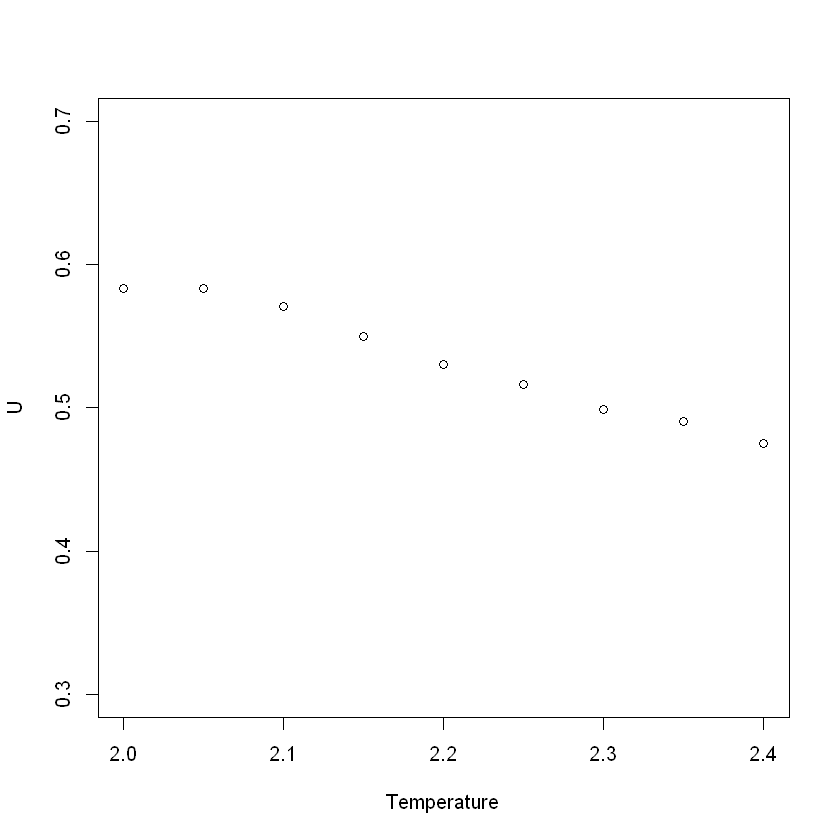

In [37]:
setwd('c:/Users/ricta/Documents/PerCoolAction/XY model/')
Temperature <- seq(2, 2.4, 0.05)
N <- c(100)#, 200, 400)
colors <- c("black", "red", "green", "violet")
folder <- 'res/'
k <- 1
for (n in N){
    file_path_U <- paste(folder, 'U_', n, '.txt', sep="")
    U = read.table(file_path_U, header = FALSE, col.names = "U")[[1]]
    if (n == 100){
        plot(Temperature, U, col = colors[k], ylim=c(0.3,0.7))
    }
    else{
        points(Temperature, U, col = colors[k])
    }
    k <- k + 1
}

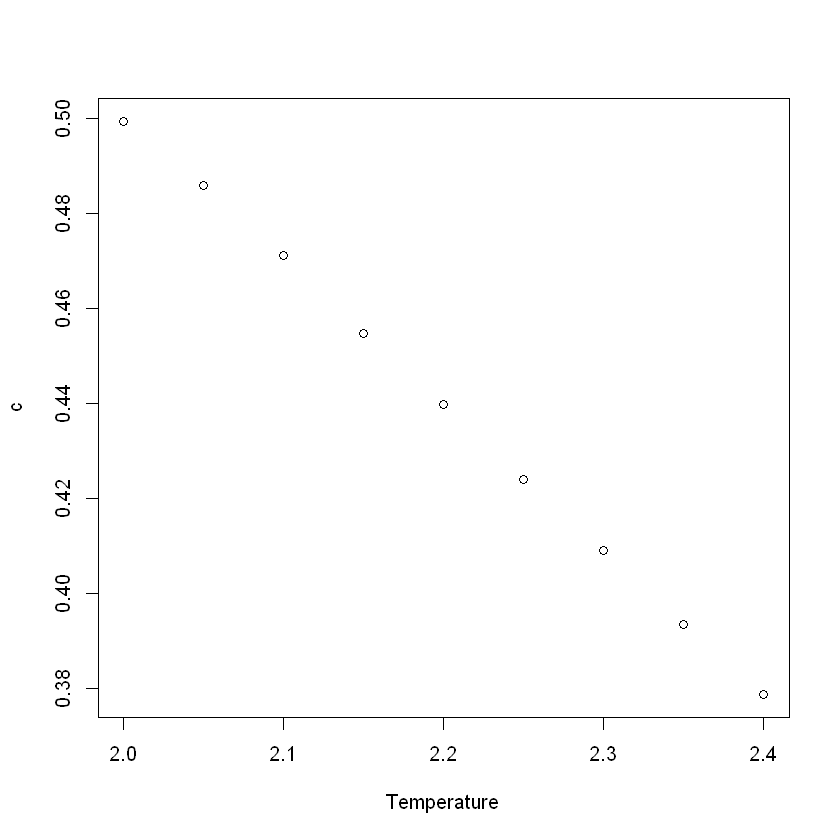

In [40]:
k <- 1
for (n in N){
    file_path_c <- paste(folder, 'c_', n, '.txt', sep="")
    c = read.table(file_path_c, header = FALSE, col.names = "c")[[1]]
    if (n == 100){
        plot(Temperature, c, col = colors[k])#, ylim = c(0.3, 1.3))
    }
    else{
        points(Temperature, c, col = colors[k])
    }
    k <- k + 1
}

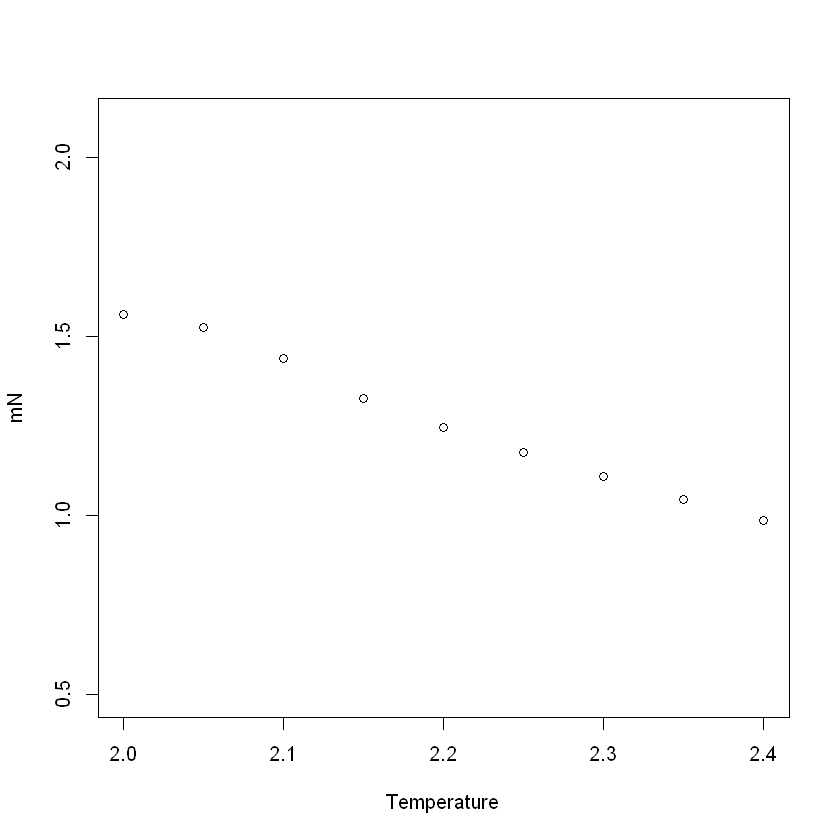

In [41]:
k <- 1
for (n in N){
    file_path_m <- paste(folder, 'mN_', n, '.txt', sep="")
    mN = read.table(file_path_m, header = FALSE, col.names = "mN")[[1]]*n^(1/4)
    if (n == 100){
        plot(Temperature, mN, col = colors[k], ylim = c(0.5, 2.1))
    }
    else{
        points(Temperature, mN, col = colors[k])
    }
    k <- k + 1
}

In [36]:
# Fit of Delta U_N
model_mine <- function(T, n, U_star, U_1, T_c, v){
    return(U_star + U_1*(1-T/T_c)*n^(1/v))
}
T_c_all <- c()
for (n in N){
    file_path_U <- paste(folder, 'U_', n, '.txt', sep="")
    U = read.table(file_path_U, header = FALSE, col.names = "U")[[1]]
    # model <- nls(U ~ model_mine(Temperature, n, U_star, U_1, T_c, v), start = list(U_star = 1, U_1 = 1, T_c = 2.3, v = 2)) # , start = list(a = 1, b = 1, c = 1)
    # coeffic <- coef(model)
    # T_c_all <- append(T_c_all, coeffic["T_c"])
    y <- log(diff(U))
    x <- rep(log(n), length(y)) 
    model <- lm(y ~ x)
    coef(model)
    # T_c_all <- append(T_c_all, coef(model))
}

Warning message in log(diff(-U[2:length(U)])):
"Si è prodotto un NaN"
Warning message in log(diff(-U[2:length(U)])):
"Si è prodotto un NaN"


Warning message in log(diff(-U[2:length(U)])):
"Si è prodotto un NaN"


In [35]:
diff(U[2:length(U)])

[1] -0.007223002 -0.007032764 -0.017911892 -0.012831282 -0.017813426
 [6] -0.015450734 -0.011500171 -0.010748721 -0.002196131 -0.034624113
[11] -0.012205504 -0.013516167  0.011852933 -0.015751938 -0.023690817

In [32]:
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72466 -0.11968  0.06653  0.33785  1.03319 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.3964     0.1737  -25.31 1.91e-12 ***
x                 NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6499 on 13 degrees of freedom
  (2 osservazioni eliminate a causa di valori mancanti)


In [27]:
T_c_all

NULL

In [4]:
U_400 = read.table(file_path_U, header = FALSE)
# C_400 = read.table(file_path_c, header = FALSE, col.names = "c")[[1]]
# # U_200 = read.table(paste(folder, 'U_', 200, '.txt', sep=""), header = FALSE, col.names = "U")[[1]]
# U_100 = read.table(paste(folder, 'U_', 100, '.txt', sep=""), header = FALSE, col.names = "U")[[1]]

ERROR: Error in file(file, "rt"): argomento 'description' non valido


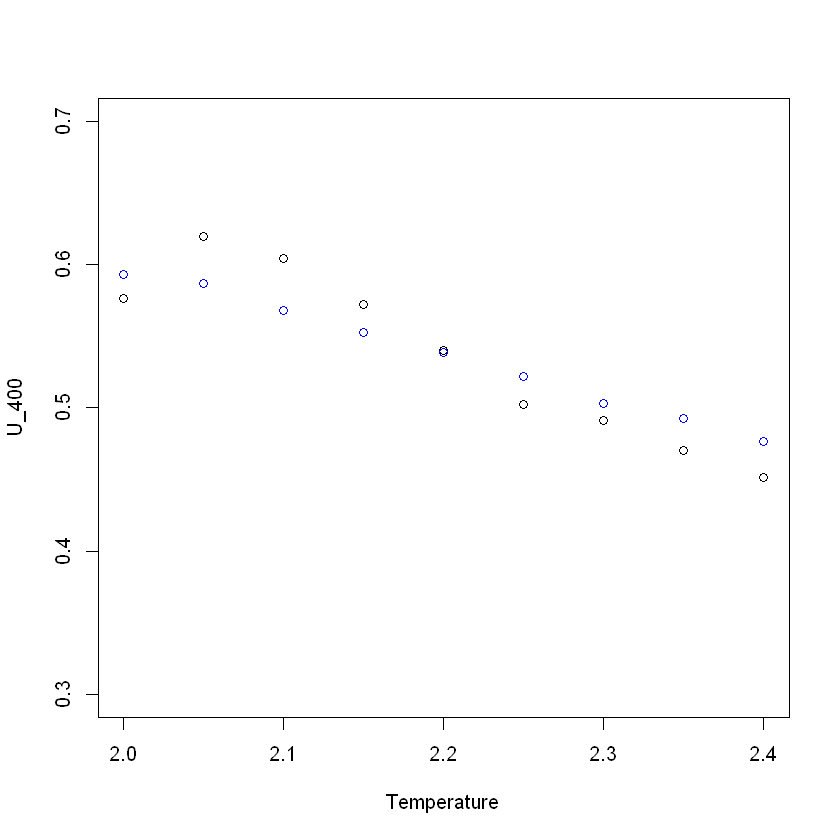

In [4]:
plot(Temperature, U_400, ylim=c(0.3, 0.7), col="black")
# points(Temperature, U_200, col="red")
points(Temperature, U_100, col="blue")

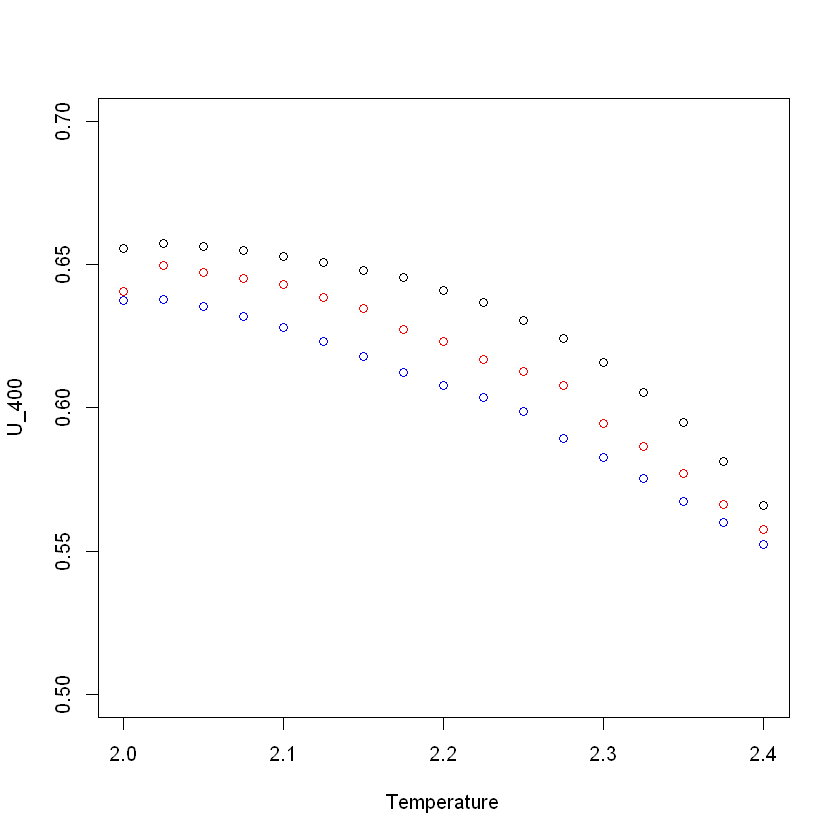

In [3]:
# old data using igraph package: from res_igraph/
Temperature <- seq(2, 2.4, 0.025)
plot(Temperature, U_400, ylim=c(0.5, 0.7), col="black")
points(Temperature, U_200, col="red")
points(Temperature, U_100, col="blue")

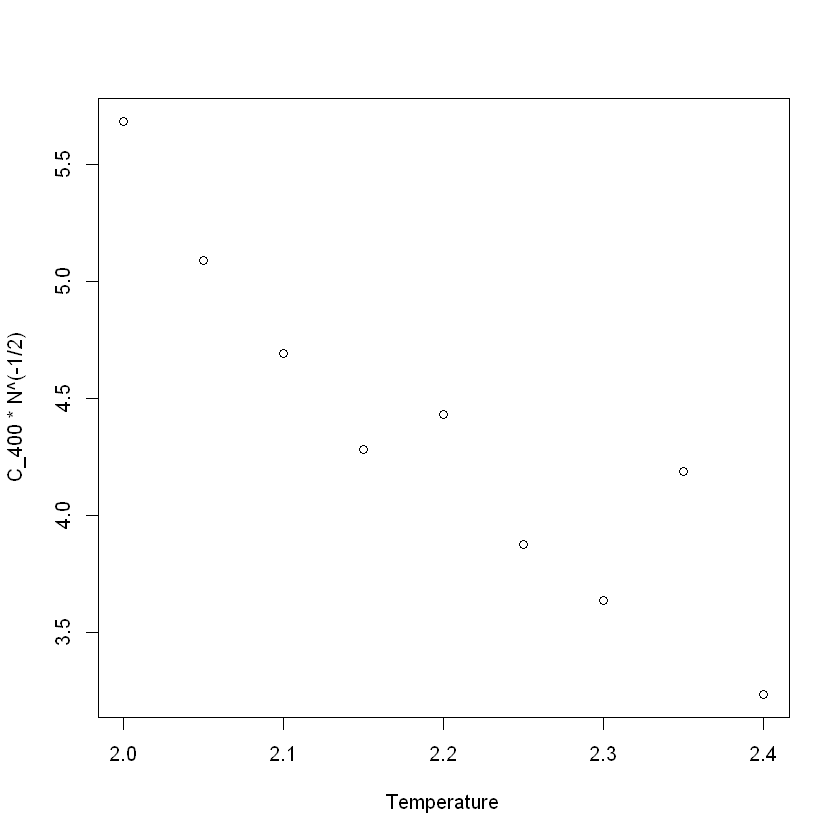

In [7]:
plot(Temperature, C_400*N^(-1/2))